In [ ]:
#install these dependencies, if needed
# !pip install psycopg
# !pip install sqlalchemy
# !pip install psycopg2-binary

In [1]:
#import pandas
import pandas as pd

In [2]:
#create sqlalchemy engine
from sqlalchemy import create_engine

dialect_driver = "postgresql"
user = "postgres"
pw = "insertPW"
host = "localhost"
port = 5432
default_db = "employee_sql"

engine = create_engine(f"{dialect_driver}://{user}:{pw}@{host}:{port}/{default_db}")

In [3]:
#write query to pull appropriate tables needed for analysis
sql_query = "SELECT employee_data.emp_number, employee_data.emp_title_id, salary_table.salary, job_title.title_id, job_title.title FROM employee_data INNER JOIN salary_table ON employee_data.emp_number=salary_table.emp_number INNER JOIN job_title ON employee_data.emp_title_id=job_title.title_id; "

#create lists for dataframe
employee_id_list = []
employee_title_id_list = []
employee_salary_list = []
employee_title_list = []

#write for loop to append data to lists
try:
    connection = engine.connect()
    results = connection.execute(sql_query)
    for row in results:
        employee_id = row.emp_number
        employee_id_list.append(employee_id),
        employee_title_id = row.emp_title_id
        employee_title_id_list.append(employee_title_id),
        employee_salary = row.salary
        employee_salary_list.append(employee_salary),
        job_title = row.title
        employee_title_list.append(job_title)
        #print(row.emp_number, row.emp_title_id)
except Exception as e:
    print("something broke... ERROR:", e)
finally:
    connection.close()
    engine.dispose()

In [4]:
#test to see if for loop worked, check length
len(employee_salary_list)

300024

In [5]:
#create dictionary 
employee_dict = {'Employee ID': employee_id_list, 'Title': employee_title_list, 'Salary': employee_salary_list}

#then convert to dataframe
employee_df = pd.DataFrame(employee_dict)

In [26]:
#view the dataframe
employee_df.columns

Index(['Employee ID', 'Title', 'Salary'], dtype='object')

array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

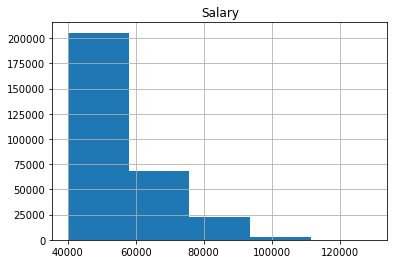

In [40]:
#Create a histogram to visualize the most common salary ranges for employees.
employee_df.hist(column='Salary', bins = 5)

In [33]:
#make groupby statement to perform avg aggregate function on it
avg_salary = employee_df.groupby(['Title']).mean().sort_values(by = 'Salary', ascending = False)

#view
avg_salary

<AxesSubplot:xlabel='Title'>

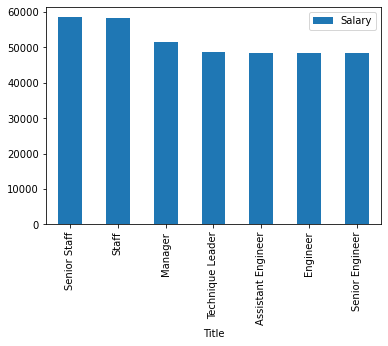

In [38]:
#plot
avg_salary.plot.bar(y = 'Salary')

In [ ]:
####_______CODE_GRAVEYARD_______####

# from sqlalchemy import create_engine
# engine = create_engine('postgresql://localhost:5432/employee_sql')
# connection = engine.connect()

# _______
#employee_df = pd.DataFrame(employee_id_list, employee_title_list, employee_salary_list).reset_index()

#Create a bar chart of average salary by title.

#employee_df.plot.bar(x = 'Title', y = 'Salary', rot = '0')
